This notebook is used to observe how difference parameters/operations effect on the EA's performance for TSP

In [16]:
import warnings
warnings.filterwarnings('ignore')

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from core.dataclass import Config, Parameters, Functions
from core.classes import SoleExp # class for following how each generations change

def create_config(name, path, file_name, num_trial, parameters, functions):
    # Assuming parameters and functions are dictionaries
    parameters_obj = Parameters(**parameters)
    functions_obj = Functions(**functions)

    return Config(
        name=name,
        path=path,
        file_name=file_name,
        num_trial=num_trial, # ignored by Sole_Exp
        parameters=parameters_obj,
        functions=functions_obj
    )

def search_sole(cfg):
    sexp = SoleExp(cfg)
    sexp.run()
    df = sexp.save_csv()
    return df

In [18]:
import time
from dataclasses import dataclass

@dataclass
class SubLog:
    best_fitness : float
    avg_fitness : float
@dataclass
class TrialLogA:
    trial : int
    time : float
    gen100 : SubLog
    gen300 : SubLog
    gen500 : SubLog
    gen800 : SubLog
    gen1000 : SubLog

# function to search by trial and kept in dataframe without saving.
def search_trail(cfg):
    num_trial = cfg.num_trial
    res = []
    for i in range(num_trial):
        log = TrialLogA(0,0,0,0,None,None,None,None)
        starttime = time.time()
        df = search_sole(cfg=cfg)
        endtime = time.time()
        log.trial = i + 1
        log.time = endtime - starttime
        log.best_fitness = df['best_fitness'].iloc[-1]
        log.avg_fitness = df['avg_fitness'].iloc[-1]
        log.gen100 = SubLog(
            df['best_fitness'][100-1],
            df['avg_fitness'][100-1]
        )
        log.gen300 = SubLog(
            df['best_fitness'][300-1],
            df['avg_fitness'][300-1]
        )
        log.gen500 = SubLog(
            df['best_fitness'][500-1],
            df['avg_fitness'][500-1]
        )
        log.gen1000 = SubLog(
            df['best_fitness'][1000-1],
            df['avg_fitness'][1000-1]
        )
        res.append(
            (log.trial,
            log.time,
            log.best_fitness,
            log.avg_fitness,
            log.gen100.best_fitness, 
            log.gen100.avg_fitness,
            log.gen300.best_fitness, 
            log.gen300.avg_fitness,
            log.gen500.best_fitness, 
            log.gen500.avg_fitness,
            log.gen1000.best_fitness, 
            log.gen1000.avg_fitness,
            ))
    
    # create dataframe
    columns = pd.MultiIndex.from_tuples(
    [
        ('Trial', ''), 
        ('Time', ''),
        ('Best_fitness', ''),
        ('Avg_fitness', ''),
        ('Gen100', 'Best'), 
        ('Gen100', 'Avg'),
        ('Gen300', 'Best'), 
        ('Gen300', 'Avg'),
        ('Gen500', 'Best'), 
        ('Gen500', 'Avg'),
        ('Gen1000', 'Best'), 
        ('Gen1000', 'Avg'),
        ])
    return  pd.DataFrame(res,columns=columns)

## Test how size's parameter effect the performance

<Axes: xlabel='gens', ylabel='best_fitness'>

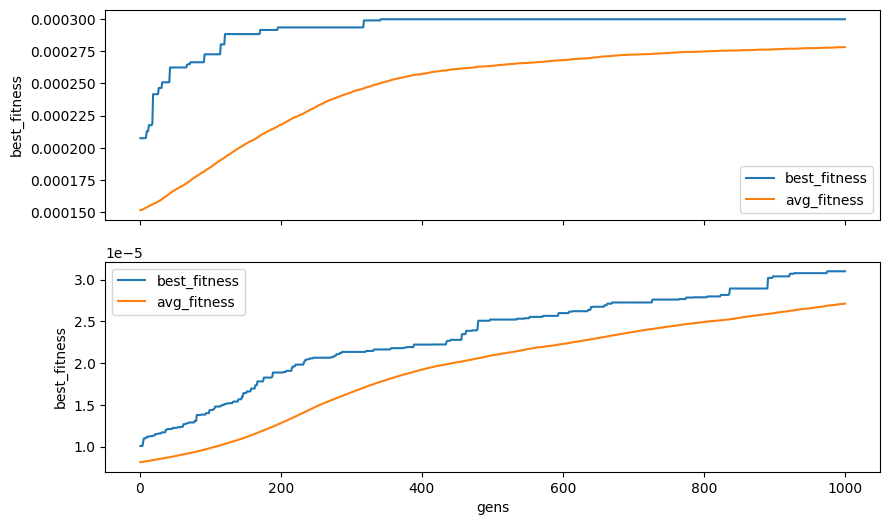

In [30]:
# baseline for the whole experiment
parameters_data = {
    "max_generations": 1000,
    "population_size": 500,
    "tournament_size": 400,
    "p_select": 1.0,
    "p_crossover": 1.0,
    "p_mutate": 1.0,
}
functions_data = {
    "crossover_fn": "point_crossover",
    "mutate_fn": "inversion",
    "replace_fn": "replace_weakest",
}
cfg = create_config(
    name="test_template",
    path="./data/burma14.xml", 
    file_name="burma_test0101",
    num_trial=1000, # ignored by Sole_Exp
    parameters=parameters_data, 
    functions=functions_data)
cfg2 = create_config(
    name="test_template",
    path="./data/brazil58.xml", 
    file_name="burma_test0101",
    num_trial=1000, # ignored by Sole_Exp
    parameters=parameters_data, 
    functions=functions_data)

df11 = search_sole(cfg=cfg)
df12 = search_sole(cfg=cfg2)

fig , axs = plt.subplots(2,1,sharex=True,figsize=(10,6))
sns.lineplot(data=df11,x='gens',y='best_fitness',label='best_fitness',ax=axs[0])
sns.lineplot(data=df11,x='gens',y='avg_fitness',label='avg_fitness',ax=axs[0])
sns.lineplot(data=df12,x='gens',y='best_fitness',label='best_fitness',ax=axs[1])
sns.lineplot(data=df12,x='gens',y='avg_fitness',label='avg_fitness',ax=axs[1])


### Torunament size

<Axes: xlabel='gens', ylabel='best_fitness'>

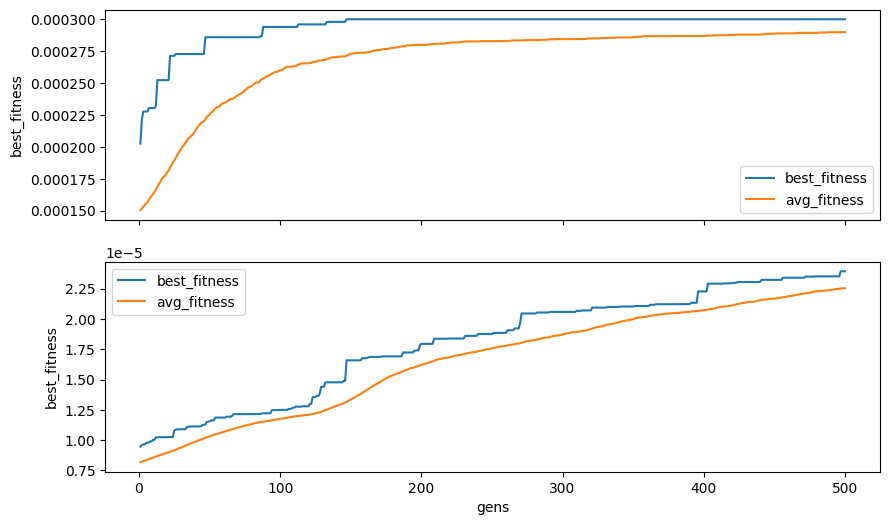

In [20]:
parameters_data = {
    "max_generations": 1000,
    "population_size": 100,
    "tournament_size": 50,
    "p_select": 1.0,
    "p_crossover": 1.0,
    "p_mutate": 1.0,
}

cfg = create_config(
    name="test_template",
    path="./data/burma14.xml", 
    file_name="burma_test0101",
    num_trial=1000, # ignored by Sole_Exp
    parameters=parameters_data, 
    functions=functions_data)
cfg2 = create_config(
    name="test_template",
    path="./data/brazil58.xml", 
    file_name="burma_test0101",
    num_trial=1000, # ignored by Sole_Exp
    parameters=parameters_data, 
    functions=functions_data)

df21 = search_sole(cfg=cfg)
df22 = search_sole(cfg=cfg2)

fig , axs = plt.subplots(2,1,sharex=True,figsize=(10,6))
sns.lineplot(data=df21,x='gens',y='best_fitness',label='best_fitness',ax=axs[0])
sns.lineplot(data=df21,x='gens',y='avg_fitness',label='avg_fitness',ax=axs[0])
sns.lineplot(data=df22,x='gens',y='best_fitness',label='best_fitness',ax=axs[1])
sns.lineplot(data=df22,x='gens',y='avg_fitness',label='avg_fitness',ax=axs[1])

<Axes: xlabel='gens', ylabel='best_fitness'>

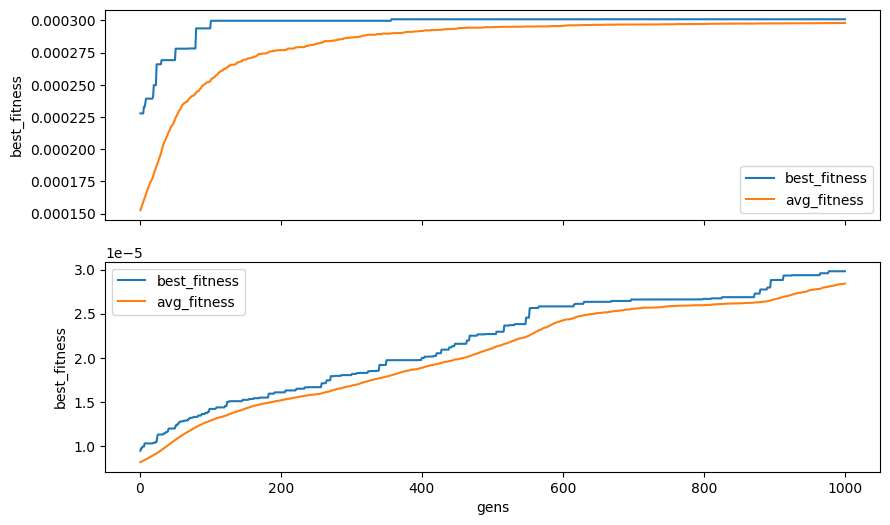

In [21]:
parameters_data = {
    "max_generations": 1000,
    "population_size": 100,
    "tournament_size": 80,
    "p_select": 1.0,
    "p_crossover": 1.0,
    "p_mutate": 1.0,
}

cfg = create_config(
    name="test_template",
    path="./data/burma14.xml", 
    file_name="burma_test0101",
    num_trial=1000, # ignored by Sole_Exp
    parameters=parameters_data, 
    functions=functions_data)
cfg2 = create_config(
    name="test_template",
    path="./data/brazil58.xml", 
    file_name="burma_test0101",
    num_trial=1000, # ignored by Sole_Exp
    parameters=parameters_data, 
    functions=functions_data)

df21 = search_sole(cfg=cfg)
df22 = search_sole(cfg=cfg2)

fig , axs = plt.subplots(2,1,sharex=True,figsize=(10,6))
sns.lineplot(data=df21,x='gens',y='best_fitness',label='best_fitness',ax=axs[0])
sns.lineplot(data=df21,x='gens',y='avg_fitness',label='avg_fitness',ax=axs[0])
sns.lineplot(data=df22,x='gens',y='best_fitness',label='best_fitness',ax=axs[1])
sns.lineplot(data=df22,x='gens',y='avg_fitness',label='avg_fitness',ax=axs[1])

In [22]:
df11

,gens,best_fitness,avg_fitness,best_gene
0,1,0.000211,0.000151,"[1, 12, 11, 5, 6, 0, 8, 10, 7, 9, 2, 3, 4, 13]"
1,2,0.000211,0.000152,"[1, 12, 11, 5, 6, 0, 8, 10, 7, 9, 2, 3, 4, 13]"
2,3,0.000211,0.000153,"[1, 12, 11, 5, 6, 0, 8, 10, 7, 9, 2, 3, 4, 13]"
3,4,0.000211,0.000154,"[1, 12, 11, 5, 6, 0, 8, 10, 7, 9, 2, 3, 4, 13]"
4,5,0.000211,0.000155,"[1, 12, 11, 5, 6, 0, 8, 10, 7, 9, 2, 3, 4, 13]"
...,...,...,...,...
495,496,0.000289,0.000264,"[8, 10, 13, 2, 3, 4, 5, 11, 6, 12, 7, 0, 1, 9]"
496,497,0.000289,0.000264,"[8, 10, 13, 2, 3, 4, 5, 11, 6, 12, 7, 0, 1, 9]"
497,498,0.000289,0.000264,"[8, 10, 13, 2, 3, 4, 5, 11, 6, 12, 7, 0, 1, 9]"
498,499,0.000289,0.000264,"[8, 10, 13, 2, 3, 4, 5, 11, 6, 12, 7, 0, 1, 9]"


In [23]:
import time
from dataclasses import dataclass

def generate_df(data_obj):
    return {
        "trial" : [x.trial for x in data_obj],
        "time" : [x.time for x in data_obj],
        "gen100" : [x.gen100 for x in data_obj],
        "gen300" : [x.gen300 for x in data_obj],
        "gen500" : [x.gen500 for x in data_obj],
        "gen800" : [x.gen800 for x in data_obj],
        "gen1000" : [x.gen1000 for x in data_obj],
    }

@dataclass
class SubLog:
    best_fitness : float
    avg_fitness : float
@dataclass
class TrialLogA:
    trial : int
    time : float
    gen100 : SubLog
    gen300 : SubLog
    gen500 : SubLog
    gen800 : SubLog
    gen1000 : SubLog

parameters_data = {
    "max_generations": 1000,
    "population_size": 100,
    "tournament_size": 10,
    "p_select": 1.0,
    "p_crossover": 1.0,
    "p_mutate": 1.0,
}

cfg = create_config(
    name="test_template",
    path="./data/burma14.xml", 
    file_name="burma_testtrial",
    num_trial=1000, # ignored by Sole_Exp
    parameters=parameters_data, 
    functions=functions_data)
cfg2 = create_config(
    name="test_template",
    path="./data/brazil58.xml", 
    file_name="burma_testtrial",
    num_trial=1000, # ignored by Sole_Exp
    parameters=parameters_data, 
    functions=functions_data)

# num_trial = 10
# res = []
# for i in range(num_trial):
#     log = TrialLogA(0,0,None,None,None,None,None)
#     starttime = time.time()
#     df = search_sole(cfg=cfg)
#     endtime = time.time()
#     log.trial = i + 1
#     log.time = endtime - starttime
#     log.gen100 = SubLog(
#         df['best_fitness'][100-1],
#         df['avg_fitness'][100-1]
#     )
#     # log.gen300 = SubLog(
#     #     df['best_fitness'][300-1],
#     #     df['avg_fitness'][300-1]
#     # )
#     log.gen500 = SubLog(
#         df['best_fitness'][500-1],
#         df['avg_fitness'][500-1]
#     )
#     # log.gen800 = SubLog(
#     #     df['best_fitness'][800-1],
#     #     df['avg_fitness'][800-1]
#     # )
#     log.gen1000 = SubLog(
#         df['best_fitness'][1000-1],
#         df['avg_fitness'][1000-1]
#     )
#     res.append(log)

# res2 = []
# for i in range(num_trial):
#     log = TrialLogA(0,0,None,None,None,None,None)
#     starttime = time.time()
#     df = search_sole(cfg=cfg2)
#     endtime = time.time()
#     log.trial = i + 1
#     log.time = endtime - starttime
#     log.gen100 = SubLog(
#         df['best_fitness'][100-1],
#         df['avg_fitness'][100-1]
#     )
#     # log.gen300 = SubLog(
#     #     df['best_fitness'][300-1],
#     #     df['avg_fitness'][300-1]
#     # )
#     log.gen500 = SubLog(
#         df['best_fitness'][500-1],
#         df['avg_fitness'][500-1]
#     )
#     # log.gen800 = SubLog(
#     #     df['best_fitness'][800-1],
#     #     df['avg_fitness'][800-1]
#     # )
#     log.gen1000 = SubLog(
#         df['best_fitness'][1000-1],
#         df['avg_fitness'][1000-1]
#     )
#     res.append(log)

In [24]:
import time
from dataclasses import dataclass

def generate_df(data_obj):
    return {
        "trial" : [x.trial for x in data_obj],
        "time" : [x.time for x in data_obj],
        "gen100" : [x.gen100 for x in data_obj],
        "gen300" : [x.gen300 for x in data_obj],
        "gen500" : [x.gen500 for x in data_obj],
        "gen800" : [x.gen800 for x in data_obj],
        "gen1000" : [x.gen1000 for x in data_obj],
    }

@dataclass
class SubLog:
    best_fitness : float
    avg_fitness : float
@dataclass
class TrialLogA:
    trial : int
    time : float
    best_fitness : float
    avg_fitness : float
    gen100 : SubLog
    gen300 : SubLog
    gen500 : SubLog
    gen1000 : SubLog

parameters_data = {
    "max_generations": 1000,
    "population_size": 100,
    "tournament_size": 10,
    "p_select": 1.0,
    "p_crossover": 1.0,
    "p_mutate": 1.0,
}

cfg = create_config(
    name="test_template",
    path="./data/burma14.xml", 
    file_name="burma_testtrial",
    num_trial=1000, # ignored by Sole_Exp
    parameters=parameters_data, 
    functions=functions_data)
cfg2 = create_config(
    name="test_template",
    path="./data/brazil58.xml", 
    file_name="burma_testtrial",
    num_trial=1000, # ignored by Sole_Exp
    parameters=parameters_data, 
    functions=functions_data)

num_trial = 10
# Burma
d_burma = []
for i in range(num_trial):
    log = TrialLogA(0,0,0,0,None,None,None,None)
    starttime = time.time()
    df = search_sole(cfg=cfg)
    endtime = time.time()
    log.trial = i + 1
    log.time = endtime - starttime
    log.best_fitness = df['best_fitness'].iloc[-1]
    log.avg_fitness = df['avg_fitness'].iloc[-1]
    log.gen100 = SubLog(
        df['best_fitness'][100-1],
        df['avg_fitness'][100-1]
    )
    log.gen300 = SubLog(
        df['best_fitness'][300-1],
        df['avg_fitness'][300-1]
    )
    log.gen500 = SubLog(
        df['best_fitness'][500-1],
        df['avg_fitness'][500-1]
    )
    log.gen1000 = SubLog(
        df['best_fitness'][1000-1],
        df['avg_fitness'][1000-1]
    )
    d_burma.append(
        (log.trial,
         log.time,
         log.best_fitness,
         log.avg_fitness,
         log.gen100.best_fitness, 
         log.gen100.avg_fitness,
         log.gen300.best_fitness, 
         log.gen300.avg_fitness,
         log.gen500.best_fitness, 
         log.gen500.avg_fitness,
         log.gen1000.best_fitness, 
         log.gen1000.avg_fitness,
         ))
# Brazil
d_brazil = []
for i in range(num_trial):
    log = TrialLogA(0,0,0,0,None,None,None,None)
    starttime = time.time()
    df = search_sole(cfg=cfg2)
    endtime = time.time()
    log.trial = i + 1
    log.time = endtime - starttime
    log.best_fitness = df['best_fitness'].iloc[-1]
    log.avg_fitness = df['avg_fitness'].iloc[-1]
    log.gen100 = SubLog(
        df['best_fitness'][100-1],
        df['avg_fitness'][100-1]
    )
    log.gen300 = SubLog(
        df['best_fitness'][300-1],
        df['avg_fitness'][300-1]
    )
    log.gen500 = SubLog(
        df['best_fitness'][500-1],
        df['avg_fitness'][500-1]
    )
    log.gen1000 = SubLog(
        df['best_fitness'][1000-1],
        df['avg_fitness'][1000-1]
    )
    d_brazil.append(
        (log.trial,
         log.time,
         log.best_fitness,
         log.avg_fitness,
         log.gen100.best_fitness, 
         log.gen100.avg_fitness,
         log.gen300.best_fitness, 
         log.gen300.avg_fitness,
         log.gen500.best_fitness, 
         log.gen500.avg_fitness,
         log.gen1000.best_fitness, 
         log.gen1000.avg_fitness,
         ))
columns = pd.MultiIndex.from_tuples(
    [
        ('Trial', ''), 
        ('Time', ''),
        ('Best_fitness', ''),
        ('Avg_fitness', ''),
        ('Gen100', 'Best'), 
        ('Gen100', 'Avg'),
        ('Gen300', 'Best'), 
        ('Gen300', 'Avg'),
        ('Gen500', 'Best'), 
        ('Gen500', 'Avg'),
        ('Gen1000', 'Best'), 
        ('Gen1000', 'Avg'),
        ])
brazil_t = pd.DataFrame(d_brazil,columns=columns)
burma_t = pd.DataFrame(d_burma,columns=columns)
burma_t

Trial      Time Best_fitness Avg_fitness    Gen100              Gen300  \
                                                Best       Avg      Best   
0     1  0.651005     0.000301    0.000291  0.000248  0.000212  0.000278   
1     2  0.412372     0.000301    0.000295  0.000263  0.000213  0.000301   
2     3  0.430005     0.000300    0.000282  0.000265  0.000214  0.000269   
3     4  0.357057     0.000301    0.000290  0.000261  0.000226  0.000295   
4     5  0.494017     0.000301    0.000294  0.000263  0.000206  0.000289   
5     6  0.388017     0.000301    0.000287  0.000232  0.000202  0.000280   
6     7  0.558001     0.000299    0.000292  0.000250  0.000207  0.000280   
7     8  0.436048     0.000300    0.000283  0.000223  0.000197  0.000274   
8     9  0.370987     0.000290    0.000283  0.000257  0.000215  0.000282   
9    10  0.497007     0.000300    0.000288  0.000255  0.000218  0.000283   

               Gen500             Gen1000            
        Avg      Best       Avg      Best       Avg  
0  0.000248  0.000295  0.000267  0.000301  0.000291  
1  0.000270  0.000301  0.000287  0.000301  0.000295  
2  0.000252  0.000286  0.000264  0.000300  0.000282  
3  0.000260  0.000301  0.000275  0.000301  0.000290  
4  0.000259  0.000301  0.000280  0.000301  0.000294  
5  0.000255  0.000287  0.000274  0.000301  0.000287  
6  0.000250  0.000297  0.000270  0.000299  0.000292  
7  0.000247  0.000278  0.000264  0.000300  0.000283  
8  0.000263  0.000287  0.000275  0.000290  0.000283  
9  0.000257  0.000295  0.000271  0.000300  0.000288

In [25]:
brazil_t

Trial      Time Best_fitness Avg_fitness    Gen100              Gen300  \
                                                Best       Avg      Best   
0     1  1.004039     0.000024    0.000024  0.000011  0.000010  0.000016   
1     2  1.000001     0.000020    0.000019  0.000012  0.000011  0.000015   
2     3  1.127966     0.000021    0.000020  0.000012  0.000010  0.000016   
3     4  0.793048     0.000020    0.000019  0.000012  0.000011  0.000014   
4     5  0.920999     0.000020    0.000019  0.000011  0.000010  0.000013   
5     6  0.872010     0.000022    0.000021  0.000012  0.000011  0.000016   
6     7  0.782014     0.000021    0.000020  0.000011  0.000010  0.000015   
7     8  0.860027     0.000022    0.000021  0.000012  0.000010  0.000015   
8     9  0.656949     0.000021    0.000020  0.000011  0.000011  0.000015   
9    10  0.671984     0.000022    0.000021  0.000012  0.000010  0.000014   

               Gen500             Gen1000            
        Avg      Best       Avg      Best       Avg  
0  0.000015  0.000019  0.000018  0.000024  0.000024  
1  0.000014  0.000017  0.000016  0.000020  0.000019  
2  0.000015  0.000018  0.000017  0.000021  0.000020  
3  0.000013  0.000015  0.000015  0.000020  0.000019  
4  0.000012  0.000014  0.000014  0.000020  0.000019  
5  0.000015  0.000019  0.000018  0.000022  0.000021  
6  0.000014  0.000018  0.000016  0.000021  0.000020  
7  0.000014  0.000017  0.000016  0.000022  0.000021  
8  0.000014  0.000016  0.000015  0.000021  0.000020  
9  0.000013  0.000018  0.000016  0.000022  0.000021

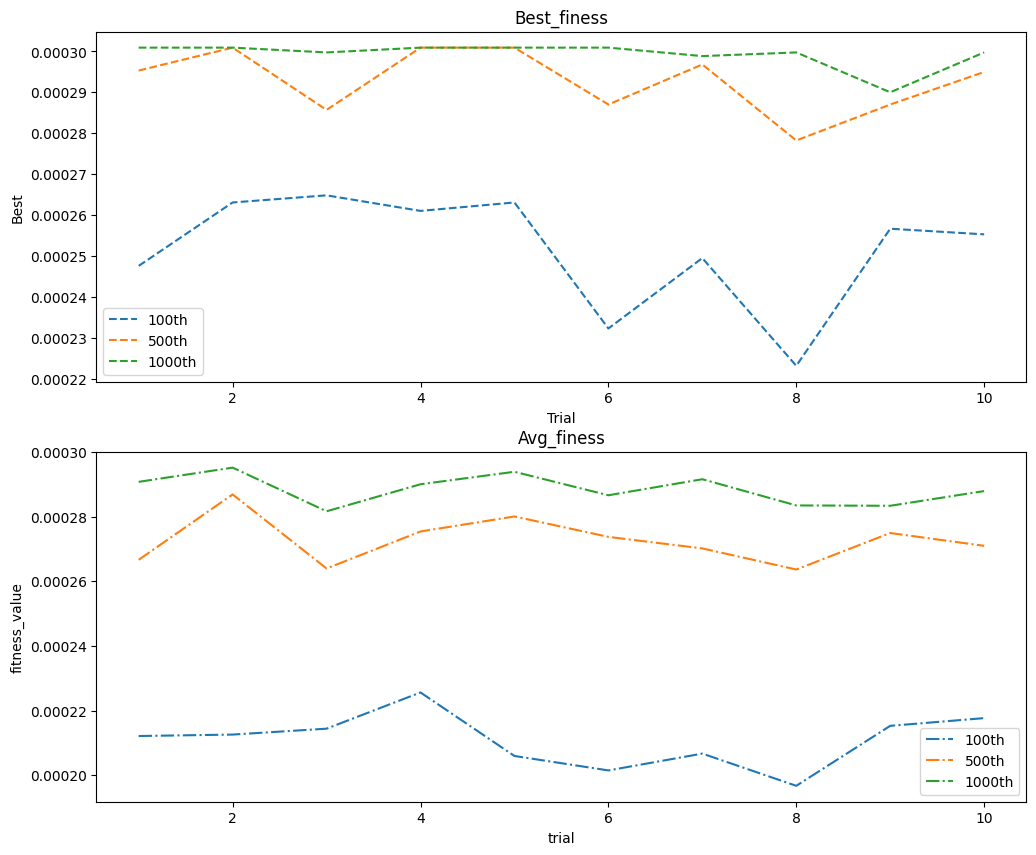

In [26]:
# Burma
fig , axs = plt.subplots(2,1,figsize=(12,10))
sns.lineplot(x=burma_t.Trial,y=burma_t.Gen100.Best,label='100th',linestyle='--',ax=axs[0])
sns.lineplot(x=burma_t.Trial,y=burma_t.Gen500.Best,label='500th',linestyle='--',ax=axs[0])
sns.lineplot(x=burma_t.Trial,y=burma_t.Gen1000.Best,label='1000th',linestyle='--',ax=axs[0])
sns.lineplot(x=burma_t.Trial,y=burma_t.Gen100.Avg,label='100th',linestyle='-.',ax=axs[1])
sns.lineplot(x=burma_t.Trial,y=burma_t.Gen500.Avg,label='500th',linestyle='-.',ax=axs[1])
sns.lineplot(x=burma_t.Trial,y=burma_t.Gen1000.Avg,label='1000th',linestyle='-.',ax=axs[1])
# sns.lineplot(x=np.arange(len(avg100)),y=avg100,label='avg100')
# plt.title('Brazil trials')
axs[0].set_title('Best_finess')
axs[1].set_title('Avg_finess')
plt.xlabel('trial')
plt.ylabel('fitness_value')
plt.show()

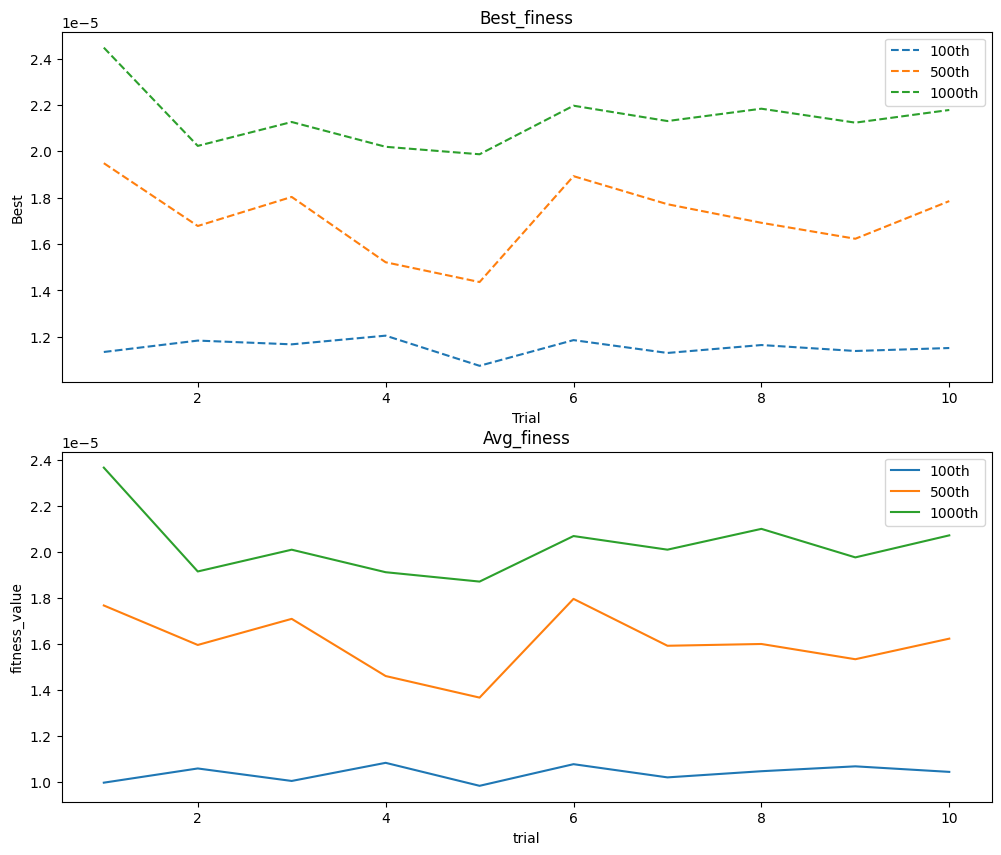

In [27]:
# Burma
fig , axs = plt.subplots(2,1,figsize=(12,10))
sns.lineplot(x=brazil_t.Trial,y=brazil_t.Gen100.Best,label='100th',linestyle='--',ax=axs[0])
sns.lineplot(x=brazil_t.Trial,y=brazil_t.Gen500.Best,label='500th',linestyle='--',ax=axs[0])
sns.lineplot(x=brazil_t.Trial,y=brazil_t.Gen1000.Best,label='1000th',linestyle='--',ax=axs[0])
sns.lineplot(x=brazil_t.Trial,y=brazil_t.Gen100.Avg,label='100th',linestyle='-',ax=axs[1])
sns.lineplot(x=brazil_t.Trial,y=brazil_t.Gen500.Avg,label='500th',linestyle='-',ax=axs[1])
sns.lineplot(x=brazil_t.Trial,y=brazil_t.Gen1000.Avg,label='1000th',linestyle='-',ax=axs[1])
# sns.lineplot(x=np.arange(len(avg100)),y=avg100,label='avg100')
# plt.title('Brazil trials')
axs[0].set_title('Best_finess')
axs[1].set_title('Avg_finess')
plt.xlabel('trial')
plt.ylabel('fitness_value')
plt.show()

In [28]:
break
# data1 = generate_df(res)
# df_res1 = pd.DataFrame(data1)
# best100 = [x.best_fitness for x in df_res1.gen100]
# avg100= [x.avg_fitness for x in df_res1.gen100]
# best300 = [x.best_fitness for x in df_res1.gen300]
# avg300= [x.avg_fitness for x in df_res1.gen300]
# best500 = [x.best_fitness for x in df_res1.gen500]
# avg500= [x.avg_fitness for x in df_res1.gen500]
# best800 = [x.best_fitness for x in df_res1.gen800]
# avg800= [x.avg_fitness for x in df_res1.gen800]
# best1000 = [x.best_fitness for x in df_res1.gen1000]
# avg1000= [x.avg_fitness for x in df_res1.gen1000]# 

SyntaxError: 'break' outside loop (4082011656.py, line 1)

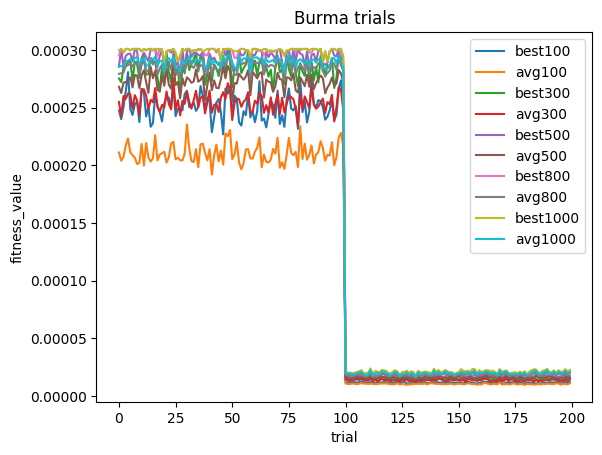

In [ ]:
# sns.lineplot(x=np.arange(len(best100)),y=best100,label='best100')
# sns.lineplot(x=np.arange(len(avg100)),y=avg100,label='avg100')
# sns.lineplot(x=np.arange(len(best300)),y=best300,label='best300')
# sns.lineplot(x=np.arange(len(avg300)),y=avg300,label='avg300')
# sns.lineplot(x=np.arange(len(best500)),y=best500,label='best500')
# sns.lineplot(x=np.arange(len(avg500)),y=avg500,label='avg500')
# sns.lineplot(x=np.arange(len(best800)),y=best800,label='best800')
# sns.lineplot(x=np.arange(len(avg800)),y=avg800,label='avg800')
# sns.lineplot(x=np.arange(len(best1000)),y=best1000,label='best1000')
# sns.lineplot(x=np.arange(len(avg1000)),y=avg1000,label='avg1000')
# plt.title('Burma trials')
# plt.xlabel('trial')
# plt.ylabel('fitness_value')
# plt.show()